In [1]:
import numpy as np
from rubin_scheduler.site_models import UnscheduledDowntimeMoreY1Data
from the35down import new_downtimes
from rubin_scheduler.utils import survey_start_mjd
from astropy.time import Time
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mjd = survey_start_mjd()
mjd_start_time = Time(mjd, format="mjd")
main_dt = UnscheduledDowntimeMoreY1Data(mjd_start_time)
main_dt.make_data()


In [3]:
main_dt.downtime

array([(<Time object: scale='tai' format='isot' value=2025-01-29T15:50:24.000>, <Time object: scale='tai' format='isot' value=2025-01-30T15:50:24.000>, 'minor event'),
       (<Time object: scale='tai' format='isot' value=2025-02-03T15:50:24.000>, <Time object: scale='tai' format='isot' value=2025-02-06T15:50:24.000>, 'intermediate event'),
       (<Time object: scale='tai' format='isot' value=2025-03-02T15:50:24.000>, <Time object: scale='tai' format='isot' value=2025-03-09T15:50:24.000>, 'major event'),
       (<Time object: scale='tai' format='isot' value=2025-04-02T15:50:24.000>, <Time object: scale='tai' format='isot' value=2025-04-03T15:50:24.000>, 'minor event'),
       (<Time object: scale='tai' format='isot' value=2025-04-07T15:50:24.000>, <Time object: scale='tai' format='isot' value=2025-04-08T15:50:24.000>, 'minor event'),
       (<Time object: scale='tai' format='isot' value=2025-04-24T15:50:24.000>, <Time object: scale='tai' format='isot' value=2025-04-25T15:50:24.000>, '

In [4]:
the_three = new_downtimes(mjd_start=mjd)

In [5]:
the_three

array([(60796.95865975, 60797.43041402), (60800.07122296, 60800.11288963),
       (60801.24879945, 60801.41829171), (60803.02129284, 60803.34281348),
       (60804.13351142, 60804.42407575), (60807.21412386, 60807.25579053),
       (60809.95274602, 60810.43539428), (60812.01941682, 60812.27896569),
       (60814.1268892 , 60814.29642779), (60815.06525141, 60815.32517979),
       (60816.071694  , 60816.26694297), (60816.98134784, 60817.05307011),
       (60819.27602442, 60819.38153487), (60819.94985317, 60820.4390628 ),
       (60821.13316232, 60821.32314782), (60821.94945611, 60822.43976153),
       (60824.27746328, 60824.35904036), (60826.94957795, 60827.3750399 ),
       (60828.1945137 , 60828.2536017 ), (60832.28095328, 60832.41383235),
       (60833.66      , 60840.66      ), (60847.05155286, 60847.09321952),
       (60849.12697627, 60849.44536096), (60851.29253525, 60851.33420192),
       (60852.391337  , 60852.43300367), (60853.04218738, 60853.08385405),
       (60854.38045711, 6

In [6]:
the_main = [(t[0].mjd, t[1].mjd) for t in main_dt.downtime]

In [7]:
len(the_main), len(the_three)

(273, 264)

In [8]:
ack = 0
for t in the_main:
    ack += t[1]-t[0]

In [9]:
ack

340.65602547631715

In [10]:
ack = 0
for t in the_three:
    ack += t[1]-t[0]

In [11]:
ack

596.90314513474

51.46634210392949 340.65602547631715


Text(0, 0.5, 'Downtime length (days)')

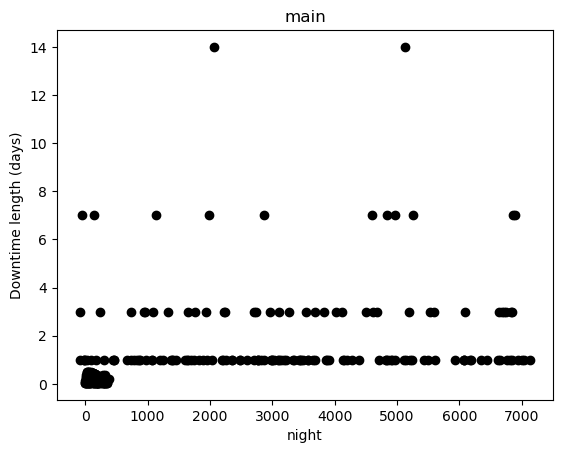

In [12]:
deltas = np.array([t[1]-t[0] for t in the_main])
t_0 = np.array([t[0] for t in the_main])-mjd
plt.plot(t_0, deltas, 'ko')
y1 = np.where(t_0 < 366)[0]

print(np.sum(deltas[y1]), np.sum(deltas))
plt.title('main')
plt.xlabel('night')
plt.ylabel('Downtime length (days)')

45.90314513474004 596.90314513474


Text(0, 0.5, 'Downtime length (days)')

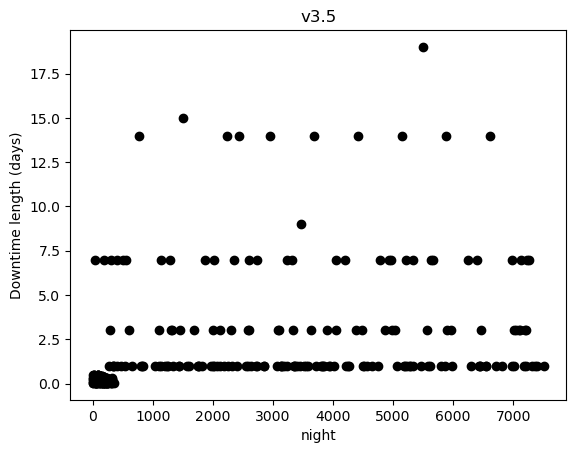

In [13]:
deltas = np.array([t[1]-t[0] for t in the_three])
t_0 = np.array([t[0] for t in the_three])-mjd
plt.plot(t_0, deltas, 'ko')
y1 = np.where(t_0 < 366)[0]

print(np.sum(deltas[y1]), np.sum(deltas))
plt.title('v3.5')
plt.xlabel('night')
plt.ylabel('Downtime length (days)')